## Numpy

1.

In [1]:
%pylab inline
#import exceptions

import numpy as np

def construct_array(X, i, j):
    return X[i, j]

X = np.array([[0, 1, 2], [10, 11, 12], [20, 21, 22]])
I = [2, 0, 1]
J = [1, 2, 0]

print(construct_array(X, I, J))

Populating the interactive namespace from numpy and matplotlib
[21  2 10]


2.

In [7]:
def nonzero_product(X):
    diag = np.diag(X)
    
    if np.count_nonzero(diag) == 0:
        return "None"
    return np.prod(diag[nonzero(diag)])
    
X = np.array([[0, 1, 2], [10, 0, 12], [20, 21, 0], [30, 31, 32]])
print(nonzero_product(X))
X = np.array([[0, 1, 2], [10, 11, 12], [20, 21, 22], [30, 31, 32]])
print(nonzero_product(X))
X = np.array([[50, 1, 2, 3], [10, 0, 12, 13], [20, 21, 2, 23]])
print(nonzero_product(X))

None
242
100


3.

In [30]:
def max_element(arr):
    if np.count_nonzero(arr) == len(arr):
        return "None"
    zeroIndex = np.nonzero(arr == 0)[0]
    indexes = zeroIndex[np.nonzero(zeroIndex < len(arr) - 1)[0]] + 1
    return max(arr[indexes])
Arr = np.array([1, 0, 0, 2, 0, 8, 9, 0, 7, 0])
print(max_element(Arr))

8


4.

In [41]:
def nearest_value(X, v):
    Y = np.absolute(X - v)
    q = np.argmin(Y)
    return X[q]
Arr = np.array([1, 0, 0, 2, 0, 8, 9, 0, 7, 0])
print(nearest_value(Arr, 1.500001))

2


5.

In [58]:
def scale(X):
    av = np.mean(X, axis = 0)
    n = np.shape(X)[0]
    if n == 0:
        raise ZeroDivisionError
    s = sqrt(n * np.var(X, axis = 0) / (n - 1))
    if 0 in s:
        raise ZeroDivisionError
    return (X - av) / s

# Test on concrete matrix
X = np.array([[0, 1, 2], [10, 0, 12], [20, 21, 0], [30, 31, 32]])
print("Test on concrete matrix:")
print(scale(X))

# Test on random matrix
randX = np.random.randint(10, size = (3, 5))
print("Test on random matrix:")
print(randX)
print(scale(randX))

Test on concrete matrix:
[[-1.161895   -0.80152148 -0.64890145]
 [-0.38729833 -0.8669518   0.03415271]
 [ 0.38729833  0.50708501 -0.78551228]
 [ 1.161895    1.16138826  1.40026103]]
Test on random matrix:
[[4 9 3 0 7]
 [7 1 9 9 0]
 [2 8 4 1 3]]
[[-0.13245324  0.6882472  -0.72586619 -0.67573738  1.0440738 ]
 [ 1.05962589 -1.14707867  1.14064686  1.14875354 -0.949158  ]
 [-0.92717265  0.45883147 -0.41478068 -0.47301616 -0.0949158 ]]


6.

In [68]:
def get_stats(X):
    return (np.linalg.det(X), 
            np.trace(X), 
            np.min(X), 
            np.max(X), 
            np.linalg.norm(X, ord="fro"), 
            np.linalg.eig(X), 
            np.linalg.inv(X))

# Test on random matrix
randX = np.random.normal(loc = 1, scale = 0.2, size = (3, 3))
print("Test on random matrix:")
print(randX)
get_stats(randX)

Test on random matrix:
[[ 1.17282874  0.76321345  0.92474069]
 [ 0.89587048  1.09334566  0.74030189]
 [ 0.78223141  0.91636776  0.94237311]]


(0.17868578414338304,
 3.208547512106033,
 0.74030188749671377,
 1.1728287412733001,
 2.7746866180138761,
 (array([ 2.74722516+0.j       ,  0.23066117+0.1088012j,
          0.23066117-0.1088012j]),
  array([[-0.60336585+0.j        ,  0.67711809+0.j        ,  0.67711809-0.j        ],
         [-0.57443038+0.j        , -0.23565816-0.33619272j,
          -0.23565816+0.33619272j],
         [-0.55315404+0.j        , -0.49538344+0.35713587j,
          -0.49538344-0.35713587j]])),
 array([[ 1.96966295,  0.7172967 , -2.49629743],
        [-1.48392814,  2.13716529, -0.22273426],
        [-0.19197101, -2.67359219,  3.34982898]]))

7.

In [77]:
M = np.zeros(100)
for i in range(0, 100):
    X = np.random.normal(size = (10, 10))
    Y = np.random.normal(size = (10, 10))
    M[i] = np.max(X * Y)
aver = np.mean(M)
quantile = np.percentile(aver, 0.95)
print(aver, quantile)

3.41167245426 3.41167245426


## Pandas

1.

In [78]:
import pandas as pd

In [280]:
df = pd.read_csv("titanic.csv")

Men:  577
Women:  314


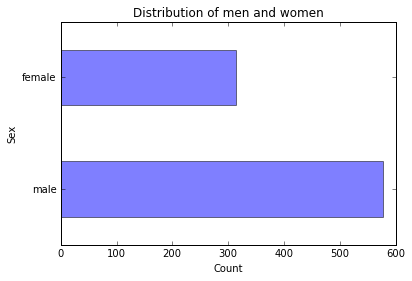

In [190]:
# Sex distribution

print("Men: ", df[df.Sex == "male"]['PassengerId'].count())
print("Women: ", df[df.Sex == "female"]['PassengerId'].count())
df['Sex'].value_counts().plot(kind='barh', color="blue", alpha=.5)
title("Distribution of men and women")
xlabel("Count")
ylabel("Sex")

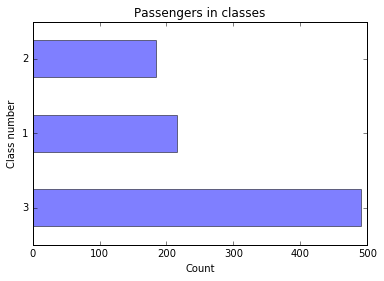

In [89]:
# Count of passengers

df['Pclass'].value_counts().plot(kind="barh", color="blue", alpha=.5)
title("Passengers in classes")
xlabel("Count")
ylabel("Class number")

In [93]:
# People's age

ages = df['Age'][df['Age'].notnull()]
print("Average: ", np.average(ages))
print("Min: ", np.min(ages))
print("Max: ", np.max(ages))

Average:  29.6991176471
Min:  0.42
Max:  80.0


0    549
1    342
Name: Survived, dtype: int64


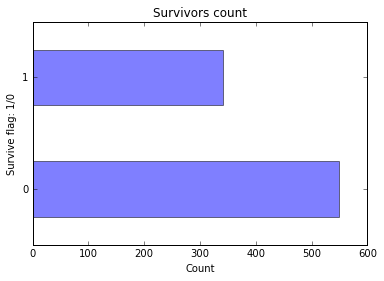

In [192]:
# Survivors

# Survivor count
print(df['Survived'].value_counts())
df['Survived'].value_counts().plot(kind="barh", color="blue", alpha=.5)
title("Survivors count")
xlabel("Count")
ylabel("Survive flag: 1/0")

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
dtype: int64


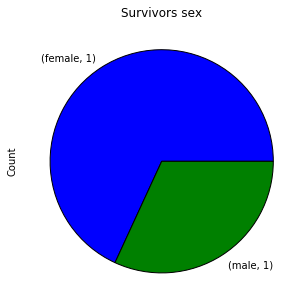

In [177]:
# Survivor sex
r = df[['Survived','Sex']][df['Survived'] == 1]
print(df.groupby(["Sex"])["Survived"].value_counts())
r.groupby(["Sex"])["Survived"].value_counts().plot(kind="pie", figsize = (5, 5))
title("Survivors sex")
ylabel("Count")

2.

In [211]:
# Who has more HP, men or women?

men = df[df["Sex"] == "male"]
women = df[df["Sex"] == "female"]

menCount = men["PassengerId"].count()
womenCount = women["PassengerId"].count()

survivedMen = men[men["Survived"] == 1]["PassengerId"].count()
survivedWomen = women[women["Survived"] == 1]["PassengerId"].count()

print("Men survivability: ", survivedMen / menCount * 100, "%")
print("Women survivability: ", survivedWomen / womenCount * 100, "%")

Men survivability:  18.8908145581 %
Women survivability:  74.2038216561 %


In [210]:
# Class with better defense

print(df.groupby(["Pclass"])["Survived"].value_counts())

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


In [224]:
# Young VS old

midAge = np.mean(df["Age"][df['Age'] != NaN])

young = df[df["Age"] < midAge]
old = df[df["Age"] > midAge]

youngCount = young["PassengerId"].count()
oldCount = old["PassengerId"].count()

youngSurvived = young[young["Survived"] == 1]["PassengerId"].count()
oldSurvived = old[old["Survived"] == 1]["PassengerId"].count()

print("Young (age < ", midAge, ") survivsbility: ", youngSurvived / youngCount * 100, "%")
print("Old (age > ", midAge, ") survivability: ", oldSurvived / oldCount * 100, "%")

Young (age <  29.69911764705882 ) survivsbility:  40.625 %
Old (age >  29.69911764705882 ) survivability:  40.6060606061 %


3.

Найдем число пропущеных признаков:

In [226]:
maxCount = df["PassengerId"].count()
print(maxCount - df.count())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Как отсюда видно, найбольше пропусков наблюдаеться в Cabin (687).
Если же посмотеть, например, на Age, то здесь не так много пропусков.
Можно предложить вычислить среднее значение возраста Age по имеющимся данным и записать его на место пропусков.
Недостатком этого метода может быть следующий: если пропущенные значения значительно отличаються от среднего, которое мы хотим записать на их место, то мы получим значительное отклонение от реального значения.
Но поскольку пропущенных значений здесь не так много, то среднее квадратичное отклонение будет крайне мало с хорошей вероятностью.

In [251]:
midAge = np.mean(np.array(df.Age[df.Age != NaN]))
age = df.Age

age[df['Age'] == NaN] = midAge

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Рассмотрим теперь Embarked.
Как видно, здесь всего два пропуска, что очень мало в сравнении с общим количеством записей.
Это логически наталкивает на мысль о том, чтобы "выбросить" строки, где пропущено поле Embarked.
Но если бы мы выбрасывали строки, где пропущено поле Cabine (а таких всего 687), то мы бы выбросили слишком много, что плохо.
В этом и заключаеться недостаток метода: его можна применять только тогда, когда данных, которые мы "выбрасываем" мало в сравнений с их общим количеством.

In [250]:
dfWithoutNullEmbarked = df[df["Embarked"].notnull()]
print(dfWithoutNullEmbarked["PassengerId"].count())

889


## Matplotlib

In [253]:
import matplotlib

1.

In [254]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

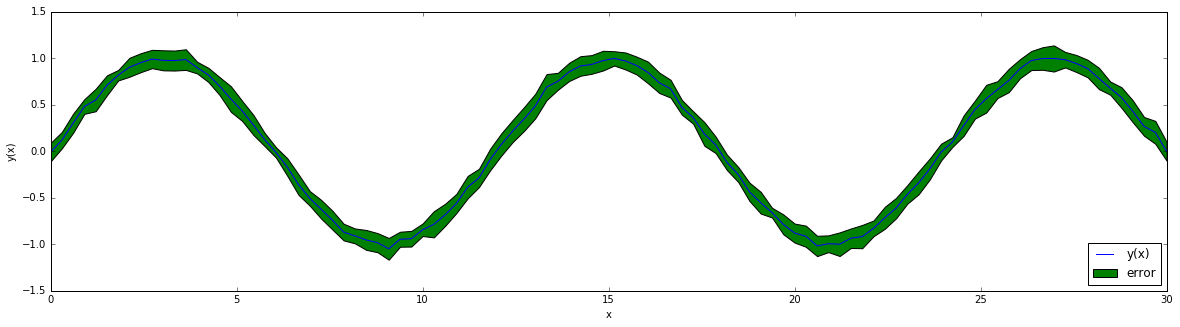

In [283]:
x, y, error = gen_uncertain_data()
plt.figure(figsize = (20, 5))

plt.plot(x, y, color = "blue")
plt.fill_between(x, y - error, y + error, facecolor = "green")
plt.legend(["y(x)", "error"], loc="lower right")
plt.xlabel("x")
plt.ylabel("y(x)")

2.

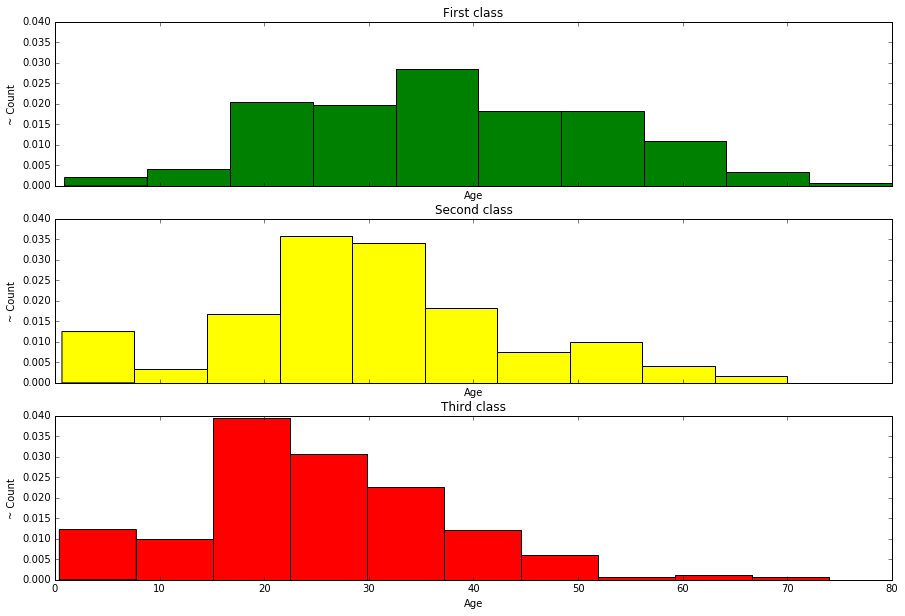

In [282]:
ageNotNull = df[df.Age.notnull()]

firstClass = ageNotNull[ageNotNull["Pclass"] == 1]["Age"]
secondClass = ageNotNull[ageNotNull["Pclass"] == 2]["Age"]
thirdClass = ageNotNull[ageNotNull["Pclass"] == 3]["Age"]

figsize(15, 10)

f, (ax1, ax2, ax3) = subplots(3, sharex = True, sharey = True)
ax1.hist(firstClass, color = "green", normed = 1)
ax1.set_title('First class')
ax1.set_xlabel("Age")
ax1.set_ylabel("~ Count")

ax2.hist(secondClass, color = "yellow", normed = 1)
ax2.set_title('Second class')
ax2.set_xlabel("Age")
ax2.set_ylabel("~ Count")

ax3.hist(thirdClass, color = "red", normed = 1)
ax3.set_title('Third class')
ax3.set_xlabel("Age")
ax3.set_ylabel("~ Count")